# 여러가지 예측분류 방법

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re

Using TensorFlow backend.


### 데이터 불러오기

In [2]:
true = pd.read_csv("D:/학교/4학년/빅데이터분석실습/발표2/data/True.csv")
fake = pd.read_csv("D:/학교/4학년/빅데이터분석실습/발표2/data/Fake.csv")

In [3]:
true.sample(3)

,title,text,subject,date
1834,"Trump says will discuss military issues, Qatar...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 7, 2017"
16084,Britain moves to tackle abuse in a bastion of ...,LONDON (Reuters) - There will be zero toleranc...,worldnews,"October 30, 2017"
9041,Senate prepares Puerto Rico debt debate amid D...,WASHINGTON (Reuters) - U.S. Senate Democratic ...,politicsNews,"June 21, 2016"


In [4]:
fake.sample(3)

,title,text,subject,date
13716,SCREAMING LEFTISTS Interrupt Trump Speech…Crow...,Screaming leftists interrupted Donald Trump s ...,politics,"Jun 10, 2016"
2142,Trump’s Border Wall Sh*t Just Got Real – Texa...,Texas landowners along the U.S.-Mexico border ...,News,"March 15, 2017"
21529,OBAMA IGNORES PLANNED PARENTHOOD BABY PARTS HA...,Justice the Obama way Instead of investigating...,left-news,"Jul 27, 2015"


In [5]:
#target컬럼추가
true['target'] = 1
fake['target'] = 0

In [6]:
#데이터 셋 균형 확인
print(true.shape)
print(fake.shape)

(21417, 5)
(23481, 5)


In [7]:
#데이터 합치기
news=pd.concat([true,fake])
news.sample(4)

,title,text,subject,date,target
1079,"Tillerson urges Iraq, Kurds to resolve conflic...",BAGHDAD (Reuters) - U.S. Secretary of State Re...,politicsNews,"October 23, 2017",1
2941,China sanguine as Trump-Xi 'bromance' sours ov...,BEIJING (Reuters) - China reacted relatively c...,politicsNews,"June 30, 2017",1
17245,SAY WHAT? AMAZON TELLS CUSTOMER THEY WERE FORC...,"When it comes to limiting our free speech, not...",Government News,"Jun 25, 2015",0
3405,Trump not planning to invoke executive privile...,(Reuters) - U.S. President Donald Trump does n...,politicsNews,"June 3, 2017",1


In [8]:
#널값 확인
news.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [9]:
# 문자열 합치기
# combine컬럼에 저장
news = pd.concat([fake, true]).reset_index(drop = True)
news['combine']= news['text']+" "+news['title']
news.sample(5)

,title,text,subject,date,target,combine
18426,NBC’s TRUMP-BASHING Chief White House Reporter...,The obnoxious anti-Trump Hallie Jackson of NBC...,left-news,"Jun 27, 2017",0,The obnoxious anti-Trump Hallie Jackson of NBC...
29531,Trump's defense chief eyes debut trip to Japan...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"January 25, 2017",1,WASHINGTON (Reuters) - U.S. President Donald T...
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0,Just when you might have thought we d get a br...
23770,Bill letting people bring concealed guns acros...,WASHINGTON (Reuters) - People would be able to...,politicsNews,"December 6, 2017",1,WASHINGTON (Reuters) - People would be able to...
39137,Brussels prosecutors to speak on ex-Catalan le...,BRUSSELS (Reuters) - Brussels prosecutors will...,worldnews,"November 5, 2017",1,BRUSSELS (Reuters) - Brussels prosecutors will...


In [10]:
import re
import nltk
from nltk.corpus import stopwords

def data_text_cleaning(text):
 
    # 영문자 이외 문자는 공백으로 변환
    only_english = re.sub('[^a-zA-Z]', ' ', text)
 
    # 소문자 변환
    no_capitals = only_english.lower().split()
 
    # 불용어 제거
    stops = set(stopwords.words('english'))
    no_stops = [word for word in no_capitals if not word in stops]
 
    # 어간 추출
#     stemmer = nltk.stem.SnowballStemmer('english')
#     stemmer_words = [stemmer.stem(word) for word in no_stops]
 
    # 공백으로 구분된 문자열로 결합하여 결과 반환
    return ' '.join(no_stops)

In [11]:
def final_text(text):
    text = data_text_cleaning(text)
    return text

In [12]:
news['combine']=news['combine'].apply(final_text)

In [13]:
news.sample(5)

,title,text,subject,date,target,combine
24109,Trump administration releases rules on disclos...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"November 15, 2017",1,washington reuters trump administration public...
3974,Hillary Unleashes BRUTAL Rant On Trump Suppor...,Hillary Clinton has had it with Donald Trump s...,News,"November 2, 2016",0,hillary clinton donald trump rude offensive su...
24833,"Turkey summons U.S. embassy undersecretary, ca...",ANKARA (Reuters) - Turkey’s foreign ministry o...,politicsNews,"October 9, 2017",1,ankara reuters turkey foreign ministry monday ...
7241,Former Trump Aide Fired For Somehow Being Too...,Let nobody tell you racists don t have options...,News,"March 28, 2016",0,let nobody tell racists options election racis...
15837,(VIDEO) UNBELIEVABLE! BLACK JUDGE BERATES VICT...,You won t believe this judge and how he berate...,politics,"Apr 12, 2015",0,believe judge berates family terrorized home i...


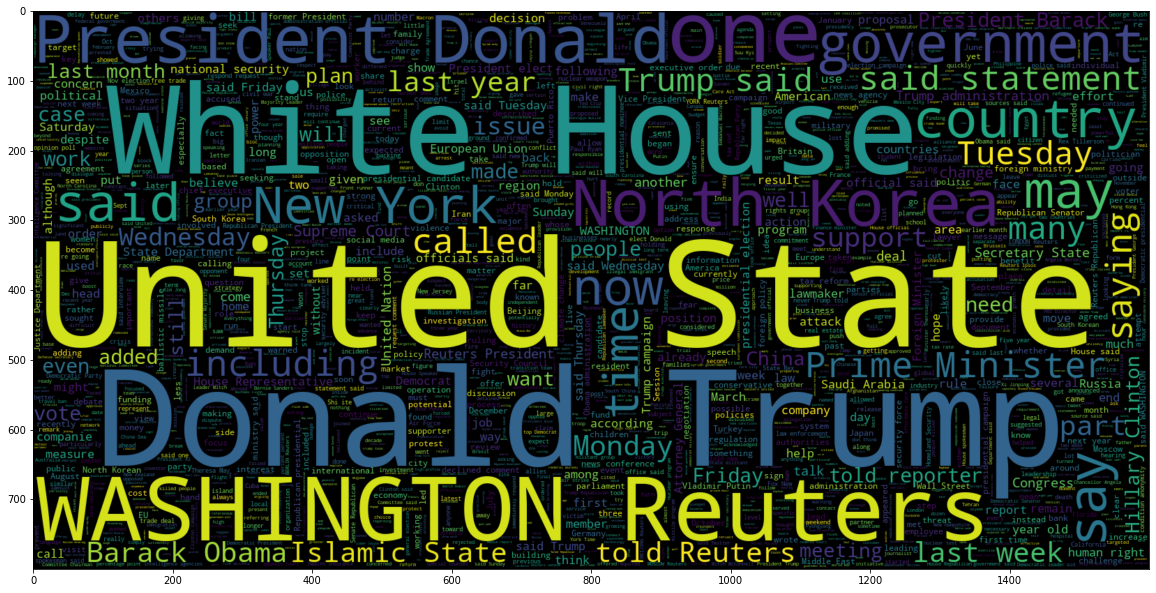

In [14]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

## test,train split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(news['combine'], news.target, test_size=0.2, random_state=2020)

## Logistic Regression Classifier

In [16]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

acc_log = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_log))

accuracy: 98.74%


## Support Vector Classifier

In [17]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_svc = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_svc))

accuracy: 99.55%


## Multinomial Naive Bayes Classifier

In [18]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_MNB = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_MNB))

accuracy: 93.61%


## Bernoulli Naive Bayes Classifier

In [19]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_BNB = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_BNB))

accuracy: 96.25%


## Gradient Boost Classifier

In [20]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_GBC = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_GBC))

accuracy: 99.5%


## XGBoost Classifier

In [21]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_XC = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_XC))

accuracy: 99.49%


## Stochastic Gradient Descent

In [22]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_SGD = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_SGD))

accuracy: 99.16%


## Decision Tree

In [23]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_DT = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_DT))

accuracy: 99.58%


## Random Forest Classifier

In [24]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_RF = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_RF))

accuracy: 99.44%


## KNN Classifier

In [25]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_knn = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_knn))

accuracy: 90.82%


## LSTM

In [26]:
X = news.text
Y = news.target
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)


In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
max_words = 500
max_len = 75
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model
model = RNN()


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
max_words = 500
max_len = 75
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model
model = RNN()


In [28]:
from tensorflow.keras.utils import plot_model 
plot_model(model, to_file='model1.png')
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [29]:
model.fit(sequences_matrix,Y_train,batch_size=256,epochs=1,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

C:\Users\kyy80\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 30530 samples, validate on 7633 samples
Epoch 1/1
30530/30530 [==============================] - 20s 644us/step - loss: 0.2089 - accuracy: 0.9164 - val_loss: 0.1638 - val_accuracy: 0.9369


In [30]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)
acc_lstm = (round(accr[1]*100,2))
print('Accuracy: {}%'.format(acc_lstm))


6735/6735 [==============================] - 2s 269us/step
Accuracy: 93.14%


## 모델 정확도 비교

In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression Classifier',
              'Support Vector Classifier',
             'Multinomial Naive Bayes Classifier',
             'Bernoulli Naive Bayes Classifier',
             'Gradient Boost Classifier',
             'XGBoost Classifier',
             'Stochastic Gradient Descent',
             'Decision Tree',
             'Random Forest Classifier',
             'KNN Classifier',
             'LSTM'],
    'Score': [acc_log,
              acc_svc,
              acc_MNB,
              acc_BNB,
              acc_GBC,
              acc_XC,
              acc_SGD,
              acc_DT,
              acc_RF,
              acc_knn,
              acc_lstm
             ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,99.58
1,Support Vector Classifier,99.55
4,Gradient Boost Classifier,99.50
5,XGBoost Classifier,99.49
8,Random Forest Classifier,99.44
6,Stochastic Gradient Descent,99.16
0,Logistic Regression Classifier,98.74
3,Bernoulli Naive Bayes Classifier,96.25
2,Multinomial Naive Bayes Classifier,93.61
10,LSTM,93.14


# Support Vector Classifier

서포트 벡터머신은 오차를 기반으로 하여 가장 잘 분류해주는 선을 찾는 분류머신입니다.


https://blog.naver.com/gdpresent/221717231990

In [32]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [33]:
svm_cm = confusion_matrix(y_test, prediction)

print(svm_cm)

[[4720   20]
 [  20 4220]]


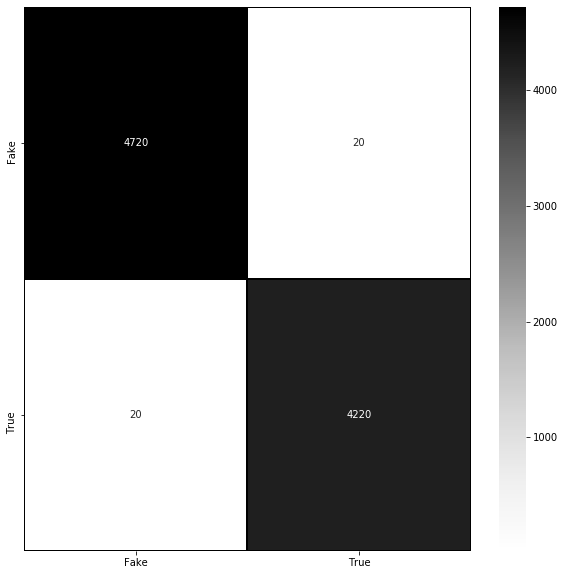

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(svm_cm,cmap= "Greys", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])


In [35]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4740
           1       1.00      1.00      1.00      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# Decision Tree

In [36]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [37]:
dt_cm = confusion_matrix(y_test, prediction)

print(dt_cm)

[[4722   18]
 [  22 4218]]


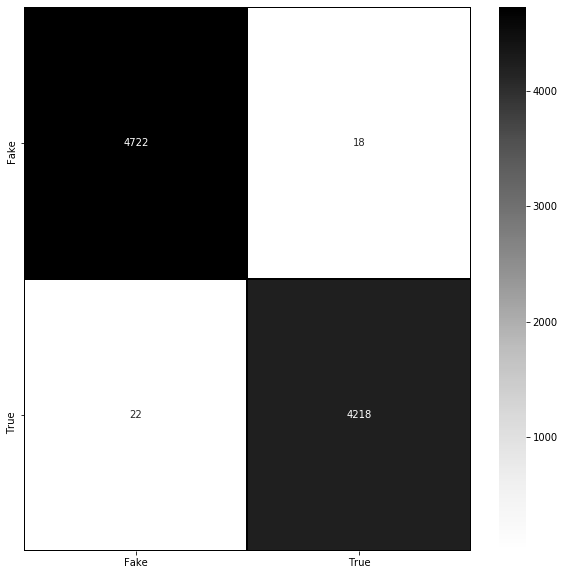

In [73]:
plt.figure(figsize = (10,10))
sns.heatmap(dt_cm,cmap= "Greys", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])
#YlOrBr


In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4740
           1       1.00      0.99      1.00      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

